# Analysis of Tips dataset of seaborn

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips=sns.load_dataset("tips")

## Overview of Data

In [3]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [4]:
print(tips.head(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


In [5]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [6]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


## Analysis of tips by different sexes:

In [7]:
avg_tips=tips.groupby("sex")["tip"].mean()
avg_tips

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

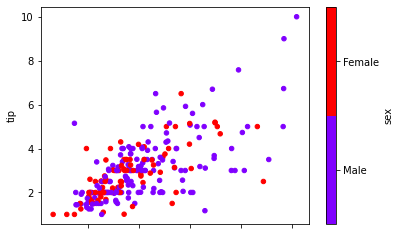

In [8]:
tips.plot(x="total_bill", y="tip", c="sex", kind="scatter",cmap="rainbow")

    We can infer that 
    * the male give higher tips than the female 
    * the higher tips are given with higher total_bills
    * the customers prefer giving tips generally with lesser total bills.

## Busiest time and day

In [9]:
tips['day'].value_counts().idxmax()

'Sat'

<BarContainer object of 4 artists>

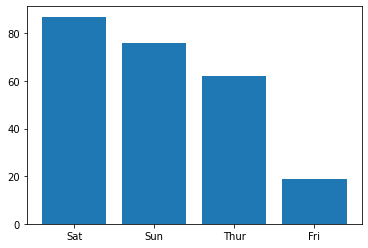

In [10]:
plt.bar(x=tips['day'].value_counts().index,height=tips['day'].value_counts())

In [11]:
print(tips['day'].value_counts())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


    * Thus, Saturday is the busiest day of the week 

In [12]:
time_counts=tips['time'].value_counts()
time_counts

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

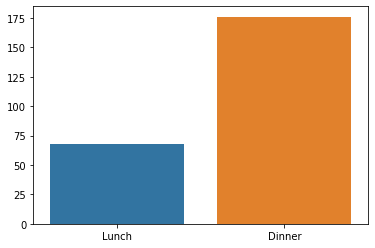

In [13]:
sns.barplot(x=time_counts.index, y=time_counts.values)

    * Most customers prefer dinner to lunch

## Analysis of frequency of  people visiting on weekends

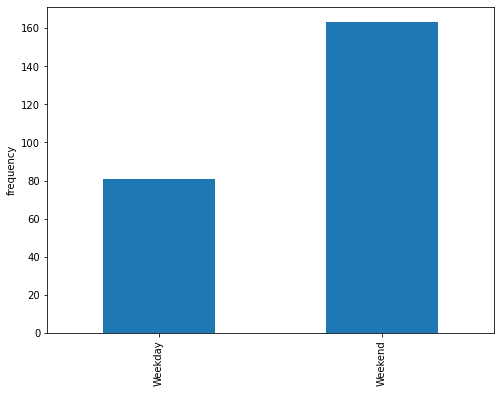

In [72]:
plt.figure(figsize=(8, 6))
tips['is_weekend'] = (tips['day'] == 'Sat') | (tips['day'] == 'Sun')
counts = tips.groupby('is_weekend').size()
counts.index = ['Weekday', 'Weekend']
counts.plot(kind='bar')
plt.ylabel("frequency")
plt.show()

    * The store is busy mainly on weekends

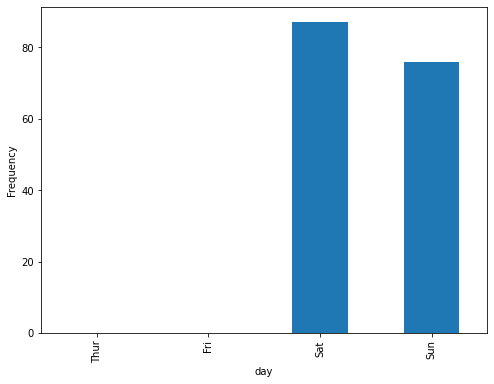

In [15]:
plt.figure(figsize=(8, 6))
weekend_tips = tips[(tips['day'] == 'Sat') | (tips['day'] == 'Sun')]
counts = weekend_tips.groupby('day').size()
counts.plot(kind='bar')
plt.ylabel("Frequency")
plt.show()

    * Saturdays generally have more customers than on Sundays

## Analysis of total bill/money spend and tips by various family sizes

In [16]:
amt=tips.groupby('size')[['total_bill','tip']].mean()
print(amt)

      total_bill       tip
size                      
1       7.242500  1.437500
2      16.448013  2.582308
3      23.277632  3.393158
4      28.613514  4.135405
5      30.068000  4.028000
6      34.830000  5.225000


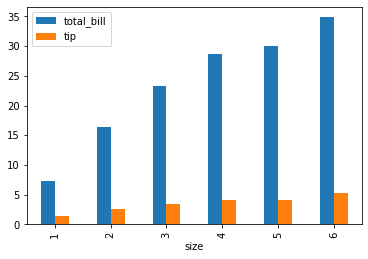

<Figure size 576x432 with 0 Axes>

In [74]:
amt.plot(kind='bar')
plt.figure(figsize=(8, 6))
plt.show()

<Figure size 576x432 with 0 Axes>

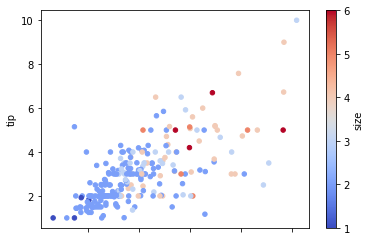

In [18]:
plt.figure(figsize=(8, 6))
tips.plot(x="total_bill", y="tip", c="size", kind="scatter",cmap="coolwarm")
plt.xlabel("total bill")
plt.show()

    Thus, we can say that:
    * the higher the family size, the more amt is the tip given
    * generally the smaller family sizes like 1-3 are inclined to give tips 

### Analysis on busiest time with majority(smoker or non smoker)

In [23]:
s=tips['smoker'].value_counts()
print("Smoker: ",s.loc['Yes'])
print("Non-Smoker: ",s.loc["No"])

Smoker:  93
Non-Smoker:  151


<AxesSubplot:xlabel='smoker', ylabel='count'>

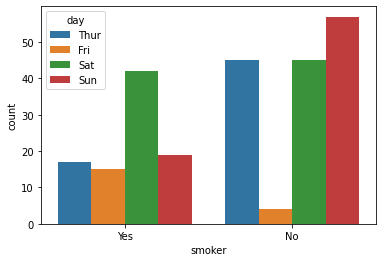

In [82]:
sns.countplot(data=tips,x="smoker",hue="day")

    * Non-smokers come less on Fridays 
    * Non-smokers come more than smokers on all days
    * Smokers come more on Saturdays

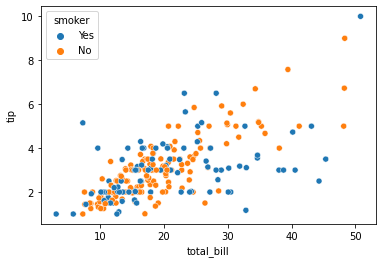

In [87]:
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="smoker")
plt.show()

    * Non-smokers customers are more
    * Smokers tend to have more total_bill than the non-smokers
    * Smokers tend to pay lesser tips compared to non-smokers

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

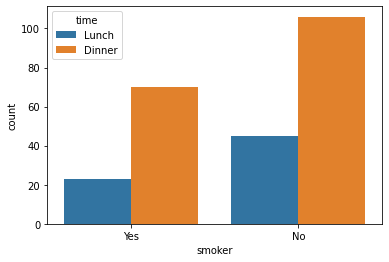

In [94]:
g=tips.groupby(['smoker','time']).size()
print(g)
sns.countplot(data=tips,x="smoker",hue="time")

    * Non-smokers and smokers come more in the dinner compared to lunch

### Analysis of the average no of customers

In [96]:
average_customers = tips['size'].mean()
print("Average number of customers:", average_customers)

Average number of customers: 2.569672131147541


### Which sex has spent on more total_bills on the later part of the week?

In [102]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [137]:
a=tips.groupby(['sex','day'])['total_bill'].size()
a

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: total_bill, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

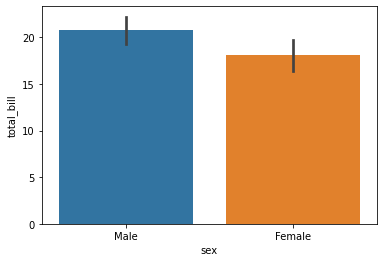

In [124]:
sns.barplot(data=tips,x='sex',y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

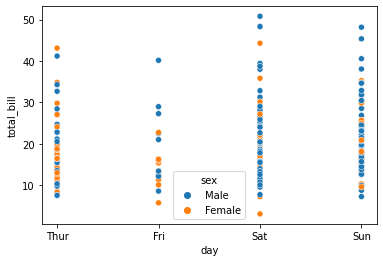

In [136]:
sns.scatterplot(data=tips,x="day",y="total_bill",hue="sex")

    We can infer that:
    * Males pay more bills than females
    * Saturdays and sundays have more male customers

### Analysis of the number of people in a group to arrange the tables accordingly

In [163]:
tips.groupby(['size'])['day'].value_counts()

size      
1     Sat      2
      Thur     1
      Fri      1
      Sun      0
2     Sat     53
      Thur    48
      Sun     39
      Fri     16
3     Sat     18
      Sun     15
      Thur     4
      Fri      1
4     Sun     18
      Sat     13
      Thur     5
      Fri      1
5     Sun      3
      Thur     1
      Sat      1
      Fri      0
6     Thur     3
      Sun      1
      Fri      0
      Sat      0
Name: day, dtype: int64

Text(0, 0.5, 'no of customers')

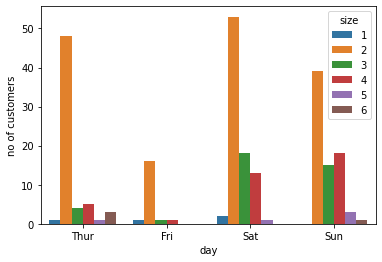

In [165]:
sns.countplot(data=tips,x='day',hue='size')
plt.ylabel("no of customers")

    Therefore, 
    * Most of the customers come are couples on all 4 days
    * Frequency of customers coming in groups of 6 is even less and only on Thurdays and Sundays
    * Fridays need lesser tables

### Tip with respect to family size

In [168]:
print(tips['size'].value_counts())

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


Text(0.5, 0, 'Family size')

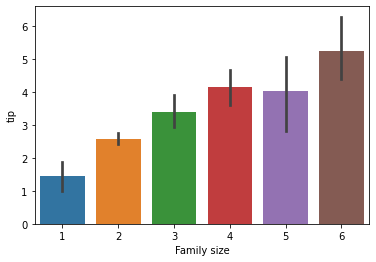

In [181]:
sns.barplot(data=tips,x="size",y="tip")
plt.xlabel("Family size")

    * The tips increase with increase in no of family members